In [1]:
#Import libraries for data exploration etc
#data is already cleaned
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)

train = pd.read_csv("train_titanic.csv")
test = pd.read_csv("test_titanic.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#assign ID values to categories for correlations heat map
train_num = train
for col_name in train_num.columns:
    if(train_num[col_name].dtype == "object"):
        train_num[col_name] = train_num[col_name].astype("category")
        train_num[col_name] = train_num[col_name].cat.codes
        
train_num
#cabin number N/A seems to be -1, embarked C is 0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,-1,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,-1,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,-1,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,-1,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [5]:
#correlations for numerical values pearson
train_num.corr()
#survived correlates most with Pclass, Sex, fare, cabin, and then somewhat with embarked and ticket
#but I already know from the previous exploration in R that almost all first and second class women survived
#and third class didn't have cabins (cabin number is fairly correlated with Pclass too), and higher classes
#will have more expensive tickets, and ticket number is also correlated with Pclass

#so this mainly reconfirms Sex + Pclass as main factors, possibly adding Embarked to it

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.036847,-0.057527,-0.001652,-0.056554,0.012658,-0.000637,0.012985
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.077221,-0.035322,0.081629,-0.164549,0.257307,0.276235,-0.176509
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.369226,0.083081,0.018443,0.319869,-0.549500,-0.537419,0.173511
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.062583,-0.017230,-0.049105,0.047348,-0.049173,0.003122,-0.010633
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.093254,-0.114631,-0.245489,0.059372,-0.182333,-0.137704,0.118492
Age,0.036847,-0.077221,-0.369226,0.062583,0.093254,1.000000,-0.308247,-0.189119,-0.075934,0.096067,0.167432,-0.044830
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.308247,1.000000,0.414838,0.079461,0.159651,-0.024829,0.071480
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.189119,0.414838,1.000000,0.020003,0.216225,0.033585,0.043351
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.075934,0.079461,0.020003,1.000000,-0.013885,-0.176515,0.011146
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096067,0.159651,0.216225,-0.013885,1.000000,0.310987,-0.230365


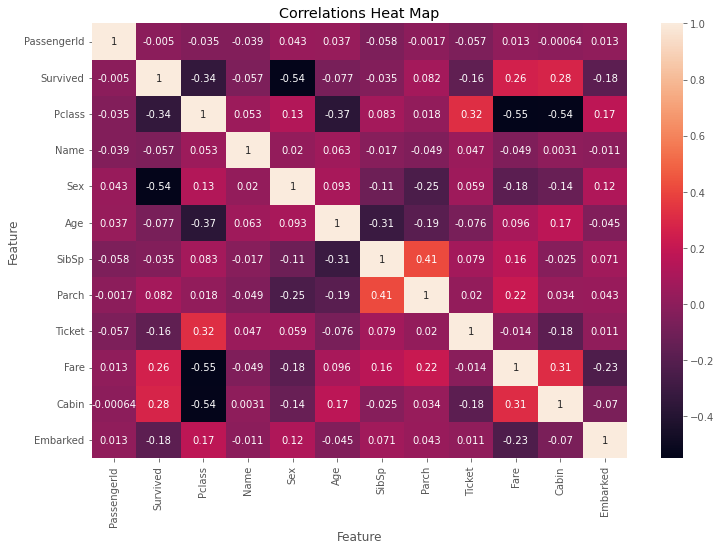

In [6]:
corr_matrix = train_num.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlations Heat Map")
plt.xlabel("Feature")
plt.ylabel("Feature")
plt.show()

#for visualisation

In [31]:
train_num.replace([np.inf, -np.inf], np.nan, inplace=True)
train_num.fillna(999, inplace=True)

In [33]:
np.any(np.isnan(train_num))

False

In [34]:
np.all(np.isfinite(train_num))

True

In [43]:
#prediction target 
y_train =train.Survived
train_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
#leaving out name and passenger ID because that won't be relevant
X_train = train_num[train_features]
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.0,1,0,523,7.2500,-1,2
1,1,0,38.0,1,0,596,71.2833,81,0
2,3,0,26.0,0,0,669,7.9250,-1,2
3,1,0,35.0,1,0,49,53.1000,55,2
4,3,1,35.0,0,0,472,8.0500,-1,2


In [44]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=1)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [45]:
#checking it works
print("Survival Predictions")
print(X_train.head())
print("Predictions")
print(train_model.predict(X_train.head()))

Survival Predictions
   Pclass  Sex   Age  SibSp  Parch  Ticket     Fare  Cabin  Embarked
0       3    1  22.0      1      0     523   7.2500     -1         2
1       1    0  38.0      1      0     596  71.2833     81         0
2       3    0  26.0      0      0     669   7.9250     -1         2
3       1    0  35.0      1      0      49  53.1000     55         2
4       3    1  35.0      0      0     472   8.0500     -1         2
Predictions
[0. 1. 1. 1. 0.]


In [38]:
#applying to test data
test_num = test
for col_name in test_num.columns:
    if(test_num[col_name].dtype == "object"):
        test_num[col_name] = test_num[col_name].astype("category")
        test_num[col_name] = test_num[col_name].cat.codes
        
test_num

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,1,34.5,0,0,152,7.8292,-1,1
1,893,3,403,0,47.0,1,0,221,7.0000,-1,2
2,894,2,269,1,62.0,0,0,73,9.6875,-1,1
3,895,3,408,1,27.0,0,0,147,8.6625,-1,2
4,896,3,178,0,22.0,1,1,138,12.2875,-1,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,353,1,NaN,0,0,267,8.0500,-1,2
414,1306,1,283,0,39.0,0,0,324,108.9000,22,0
415,1307,3,332,1,38.5,0,0,346,7.2500,-1,2
416,1308,3,384,1,NaN,0,0,220,8.0500,-1,2


In [39]:
test_num.replace([np.inf, -np.inf], np.nan, inplace=True)
test_num.fillna(999, inplace=True)

In [46]:
X_test = test_num[train_features]
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,34.5,0,0,152,7.8292,-1,1
1,3,0,47.0,1,0,221,7.0000,-1,2
2,2,1,62.0,0,0,73,9.6875,-1,1
3,3,1,27.0,0,0,147,8.6625,-1,2
4,3,0,22.0,1,1,138,12.2875,-1,2


In [50]:
test_num['Survival_Test'] = model.predict(X_test)
test_num.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survival_Test
0,892,3,206,1,34.5,0,0,152,7.8292,-1,1,0.0,0.0
1,893,3,403,0,47.0,1,0,221,7.0000,-1,2,1.0,1.0
2,894,2,269,1,62.0,0,0,73,9.6875,-1,1,0.0,0.0
3,895,3,408,1,27.0,0,0,147,8.6625,-1,2,0.0,0.0
4,896,3,178,0,22.0,1,1,138,12.2875,-1,2,1.0,1.0


In [51]:
test_num.to_csv('test_prediction.csv')

Outcome Model: 0.66
Outcome Correlation Matrix Prediction (female passengers in first and second class): 0.77

In [55]:
#Running the model again with fewer variables: embarked, parch, age, the next-best according to the correlation matrix

train_features2 = ['Pclass', 'Sex', 'Age', 'Parch', 'Embarked']
X_train = train_num[train_features2]

model2 = DecisionTreeRegressor(random_state=2)
model2.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2)

In [57]:
X_test = test_num[train_features2]
test_num['Survival_Test'] = model2.predict(X_test)
test_num.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survival_Test
0,892,3,206,1,34.5,0,0,152,7.8292,-1,1,0.0,0.00
1,893,3,403,0,47.0,1,0,221,7.0000,-1,2,1.0,0.00
2,894,2,269,1,62.0,0,0,73,9.6875,-1,1,0.0,1.00
3,895,3,408,1,27.0,0,0,147,8.6625,-1,2,0.0,0.75
4,896,3,178,0,22.0,1,1,138,12.2875,-1,2,1.0,0.00


In [58]:
test_num.to_csv('test_prediction2.csv')

Model outcome: 0.66
Correlation Matrix outcome more accurate then Decision Tree Regressor outcome